In [ ]:
!pip install datasets
!pip install pystac
!pip install planetary_computer
!pip install rioxarray
!pip install pandas
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 48.3 MB/s eta 0:00:00


In [ ]:
import os
import sys
import csv
import glob
import joblib
import datasets
import numpy as np
import pandas as pd
from pathlib import Path

# Machine Learning imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as cumlRF
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, KFold
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Geospatial related imports
from osgeo import gdalconst
from osgeo import gdal

from pprint import pprint

# Ignore a few warnings for cleaner output
warnings.filterwarnings('ignore')
%matplotlib inline

# **MODIS Land Surface Temperature/Emissivity Daily**
Daytime land surface temperature daily 1km (Kelvin)

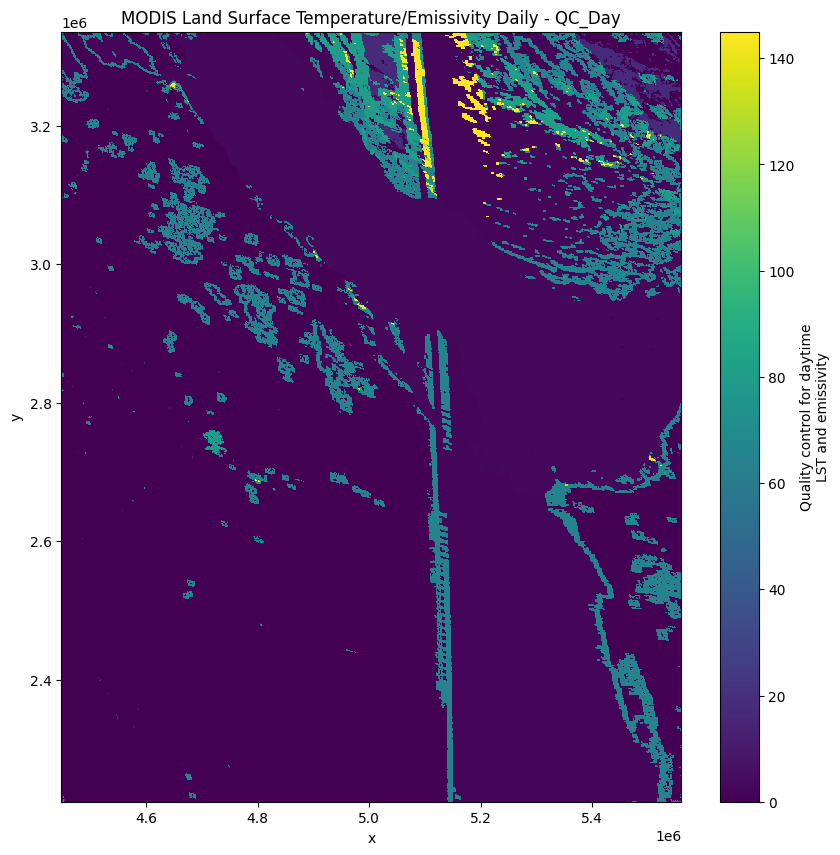

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MOD11A1.A2024009.h22v06.061.2024010215040.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "QC_Day"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

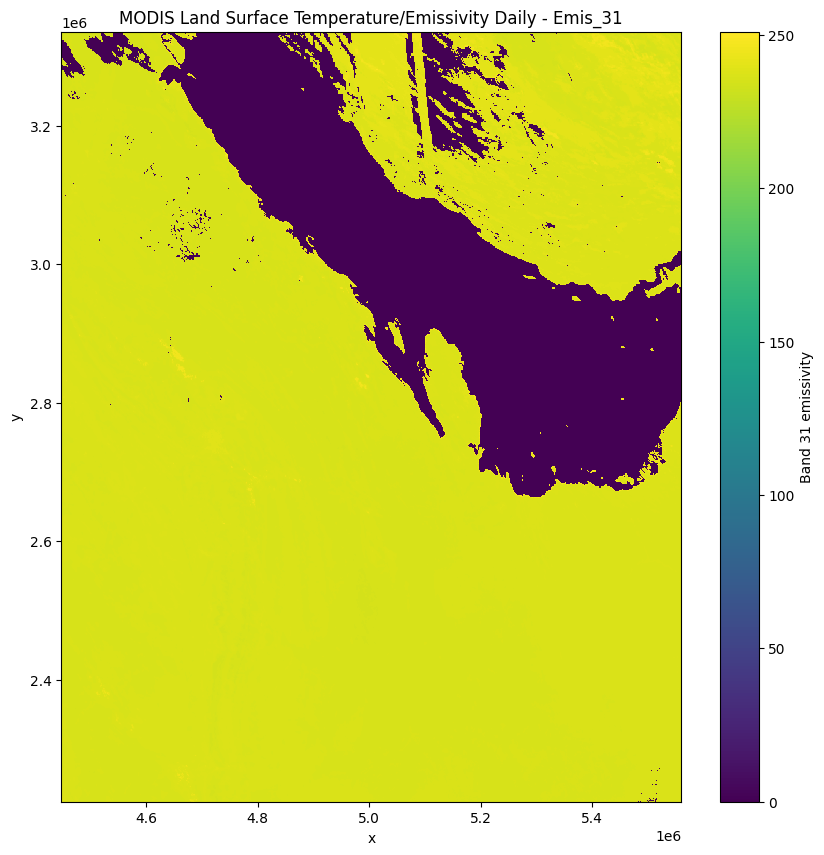

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MOD11A1.A2024009.h22v06.061.2024010215040.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Emis_31"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

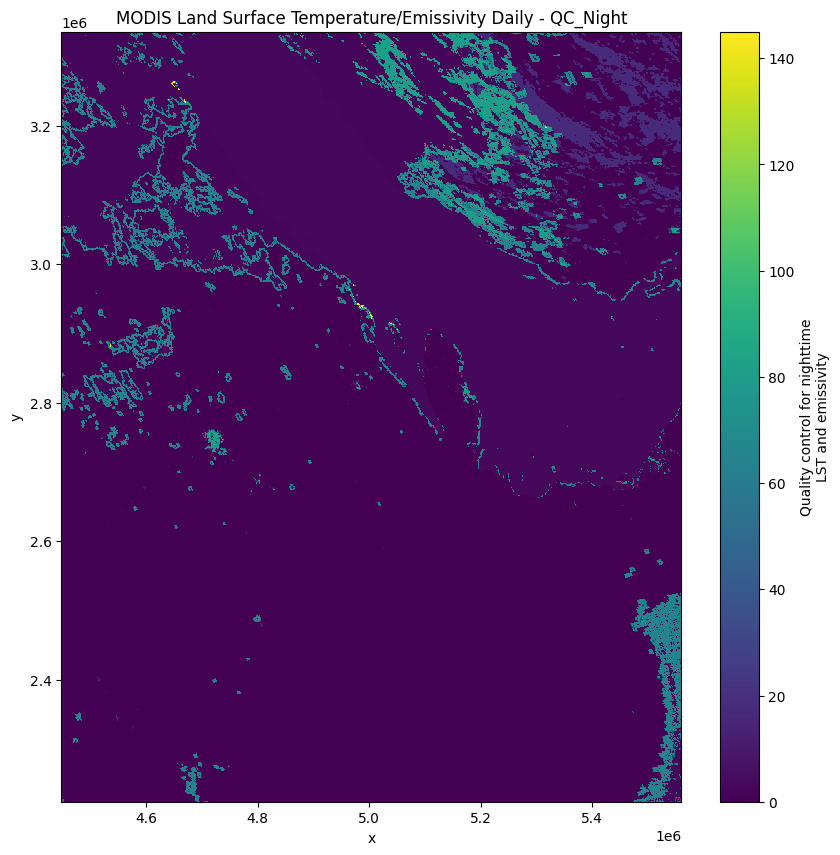

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MOD11A1.A2024009.h22v06.061.2024010215040.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "QC_Night"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

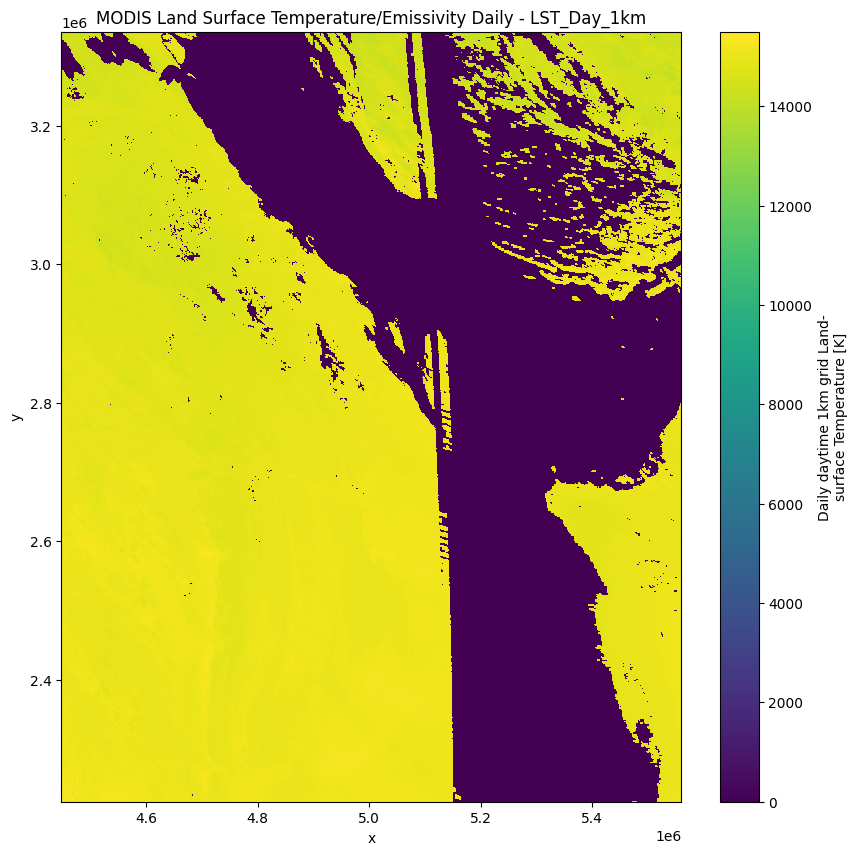

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MOD11A1.A2024009.h22v06.061.2024010215040.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "LST_Day_1km"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

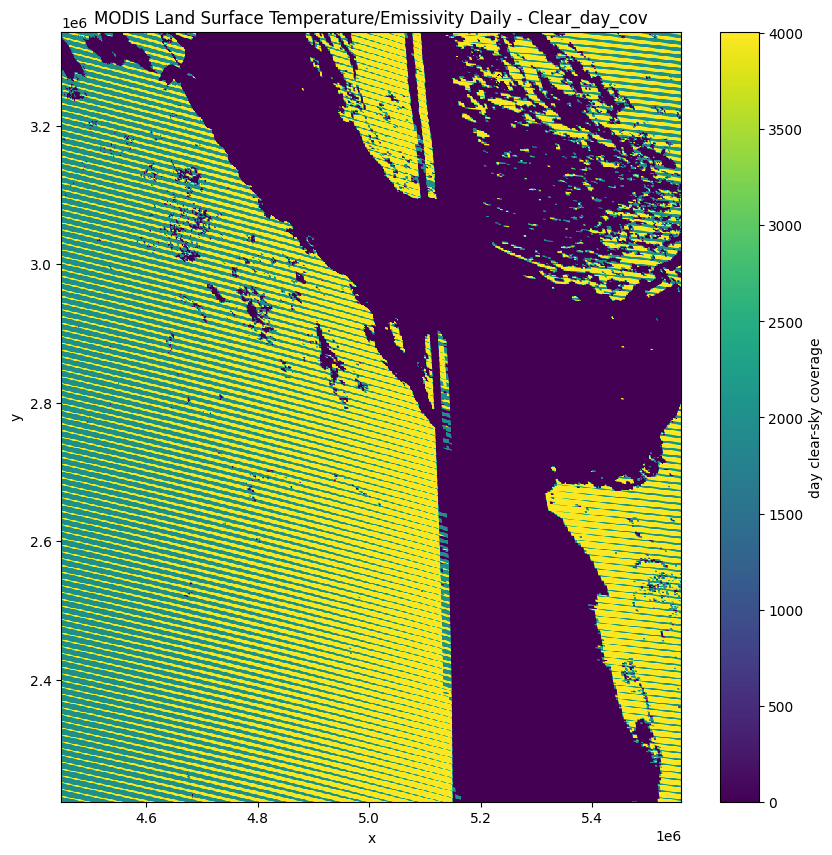

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MOD11A1.A2024009.h22v06.061.2024010215040.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Clear_day_cov"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

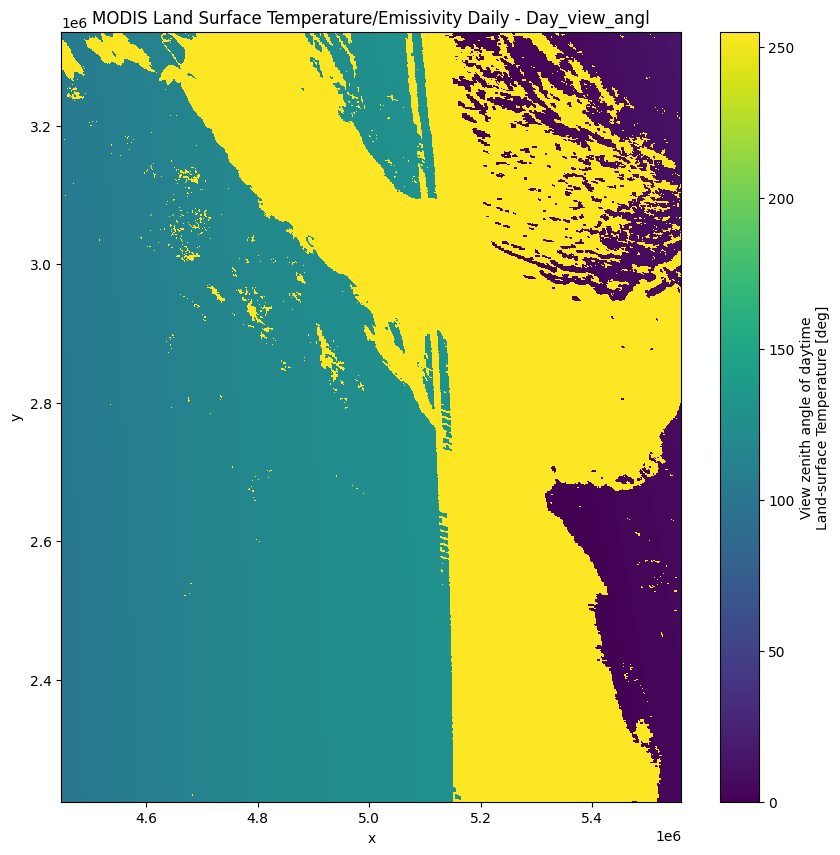

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MOD11A1.A2024009.h22v06.061.2024010215040.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Day_view_angl"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

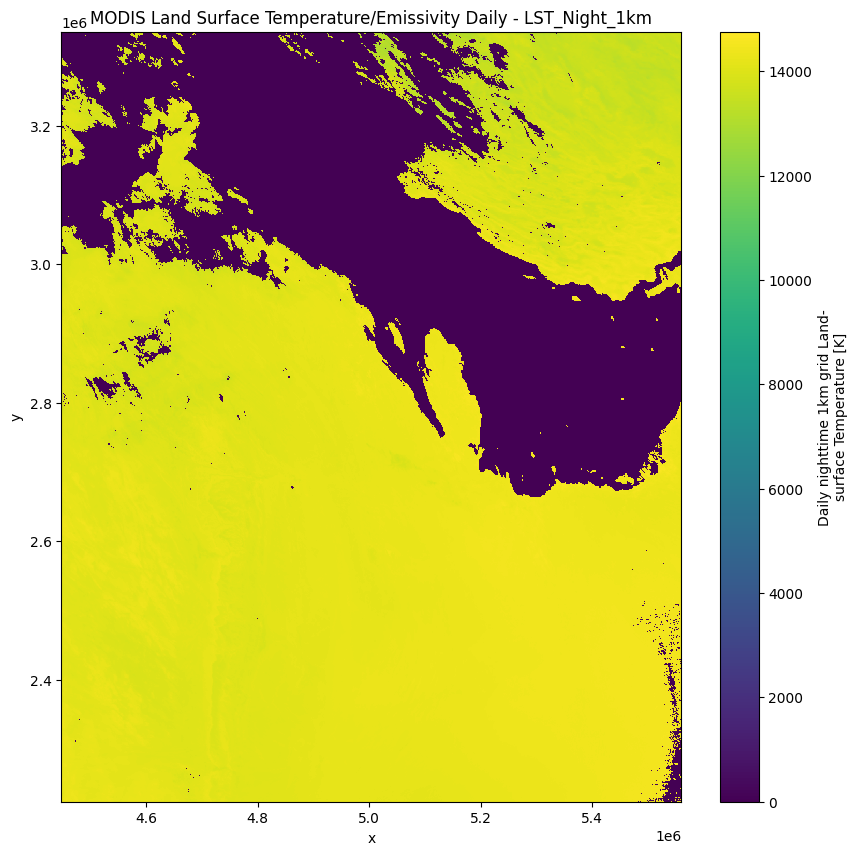

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MOD11A1.A2024009.h22v06.061.2024010215040.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "LST_Night_1km"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

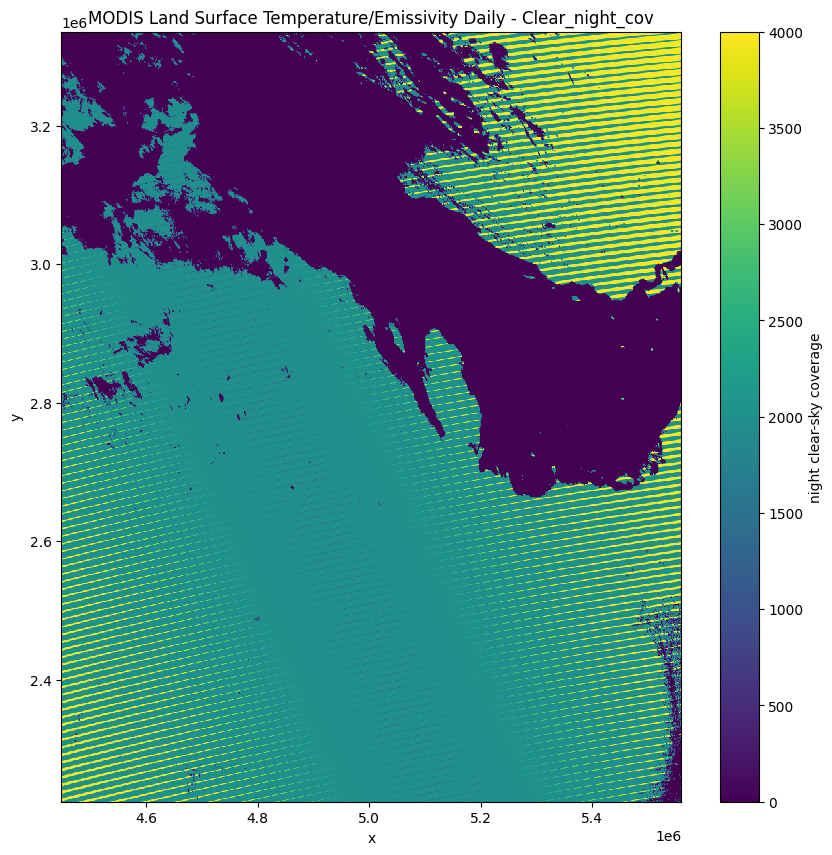

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MOD11A1.A2024009.h22v06.061.2024010215040.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Clear_night_cov"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

# MODIS Land Surface Temperature/Emissivity 8-Day
Daytime land surface temperature 8-day 1km (Kelvin)

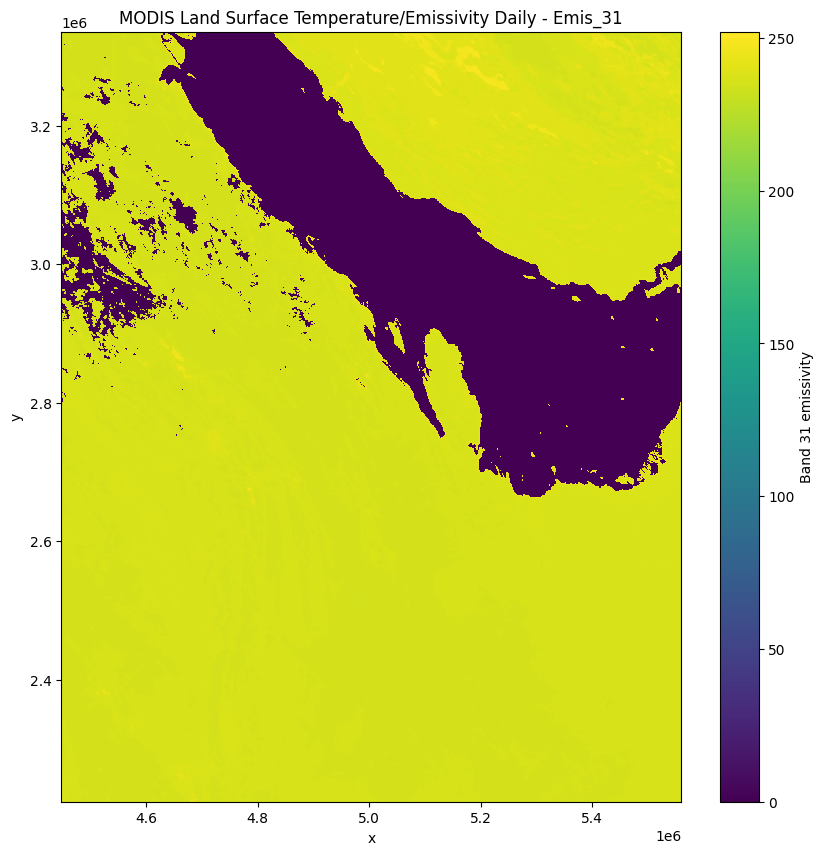

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MYD11A2.A2023361.h22v06.061.2024007011735.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Emis_31"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

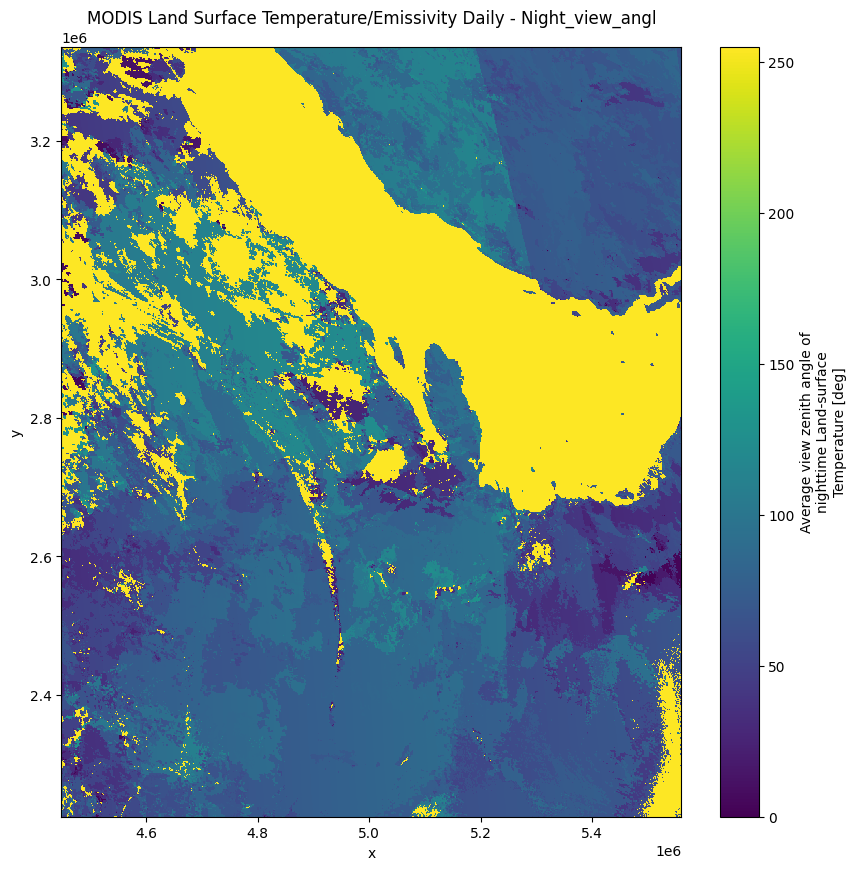

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MYD11A2.A2023361.h22v06.061.2024007011735.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Night_view_angl"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

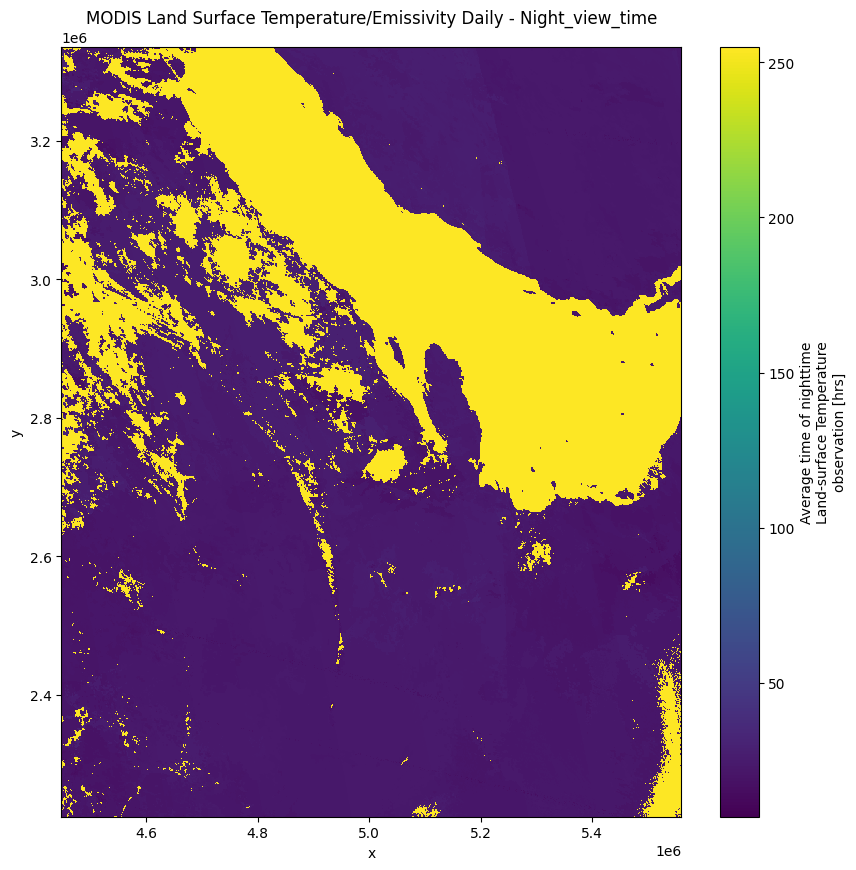

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MYD11A2.A2023361.h22v06.061.2024007011735.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Night_view_time"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

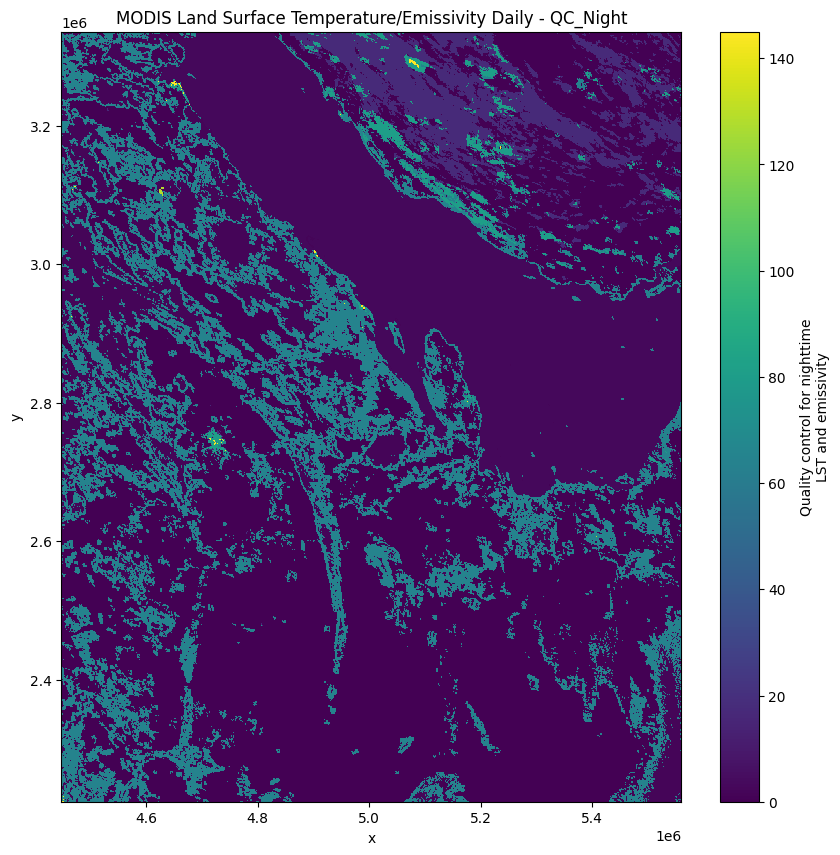

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MYD11A2.A2023361.h22v06.061.2024007011735.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "QC_Night"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

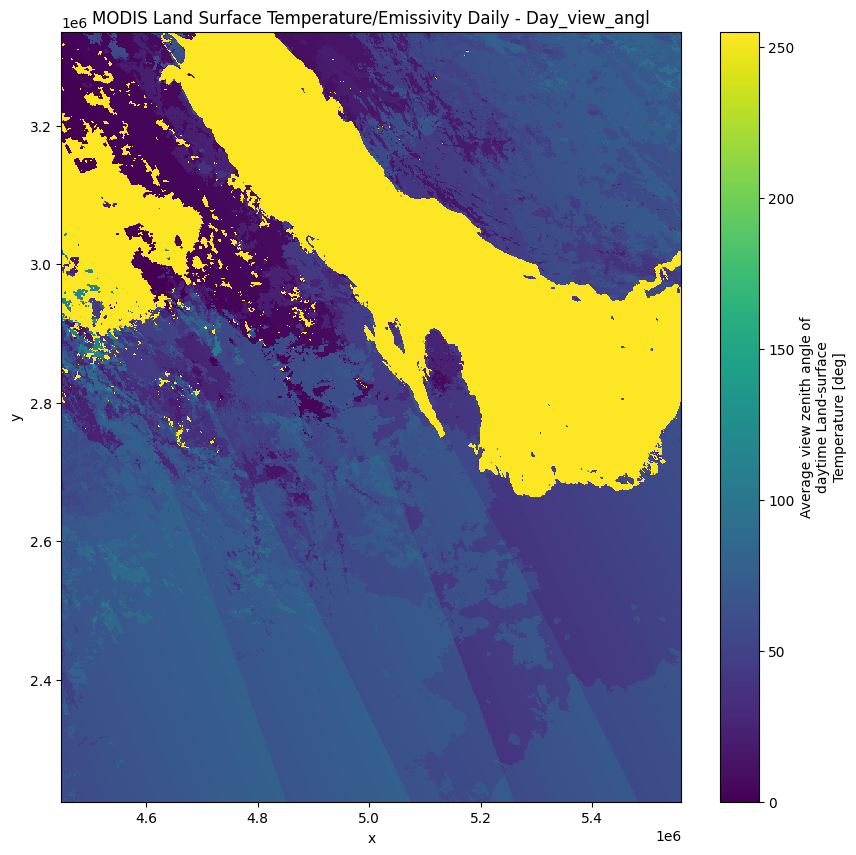

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MYD11A2.A2023361.h22v06.061.2024007011735.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "Day_view_angl"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

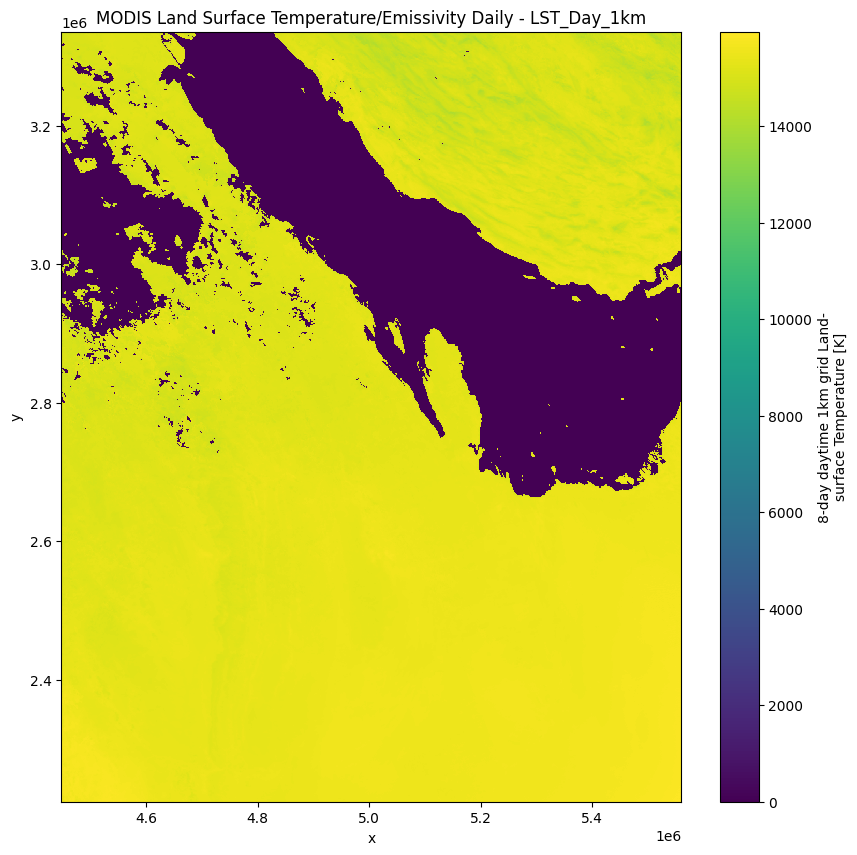

In [ ]:
item_url = "https://raw.githubusercontent.com/Madhesh-V/Nasa-Pale-Blue-Dot-Project/main/Clean%20Water%20and%20Sanitation/raw%20data/kuwait/MYD11A2.A2023361.h22v06.061.2024007011735.json"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'Emis_31', 'Emis_32', 'QC_Night', 'LST_Day_1km', 'Clear_day_cov', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_night_cov', 'Night_view_angl', 'Night_view_time')
asset_key = "LST_Day_1km"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"MODIS Land Surface Temperature/Emissivity Daily - {asset_key}")
plt.show()

# **Global Surface Water**
Global surface water distribution and dynamics from 1984 to 2020

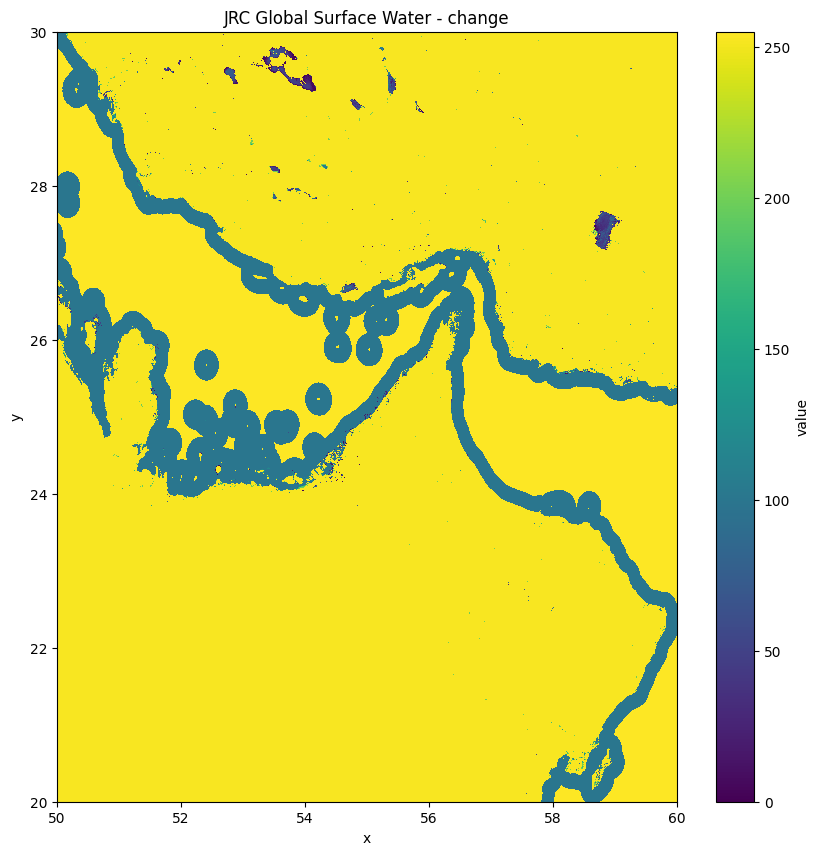

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/jrc-gsw/items/50E_30Nv1_3_2020"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'extent', 'occurrence', 'recurrence', 'seasonality', 'transitions')
asset_key = "change"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"JRC Global Surface Water - {asset_key}")
plt.show()

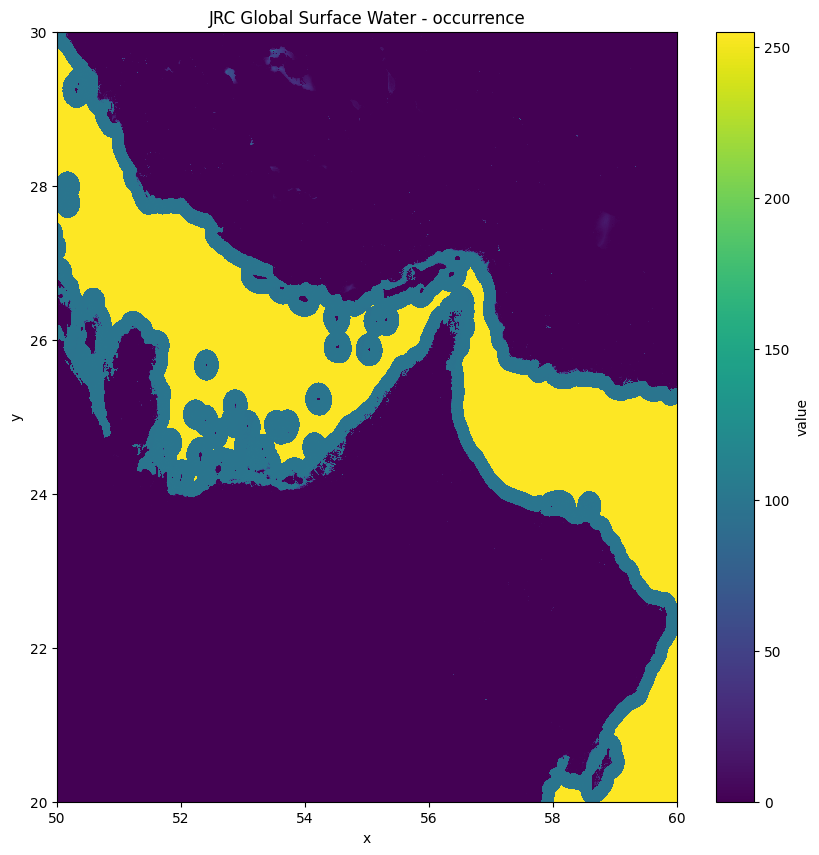

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/jrc-gsw/items/50E_30Nv1_3_2020"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'extent', 'occurrence', 'recurrence', 'seasonality', 'transitions')
asset_key = "occurrence"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"JRC Global Surface Water - {asset_key}")
plt.show()

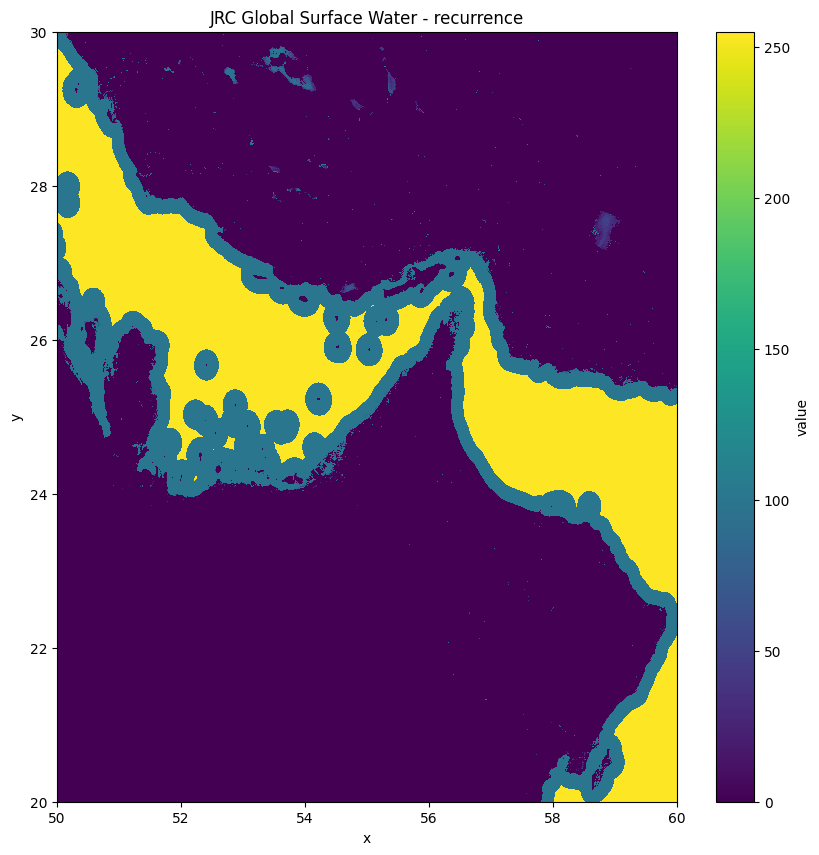

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/jrc-gsw/items/50E_30Nv1_3_2020"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Open one of the data assets (other asset keys to use: 'extent', 'occurrence', 'recurrence', 'seasonality', 'transitions')
asset_key = "recurrence"
asset_href = signed_item.assets[asset_key].href
ds = rioxarray.open_rasterio(asset_href)

# Select a specific band for visualization (adjust '1' to the desired band index)
selected_band = ds.sel(band=1)

# Plot the raster data using Matplotlib
plt.figure(figsize=(10, 10))
selected_band.plot.imshow(cmap="viridis", add_colorbar=True)
plt.title(f"JRC Global Surface Water - {asset_key}")
plt.show()

# **Landsat Collection 2 Level-1**

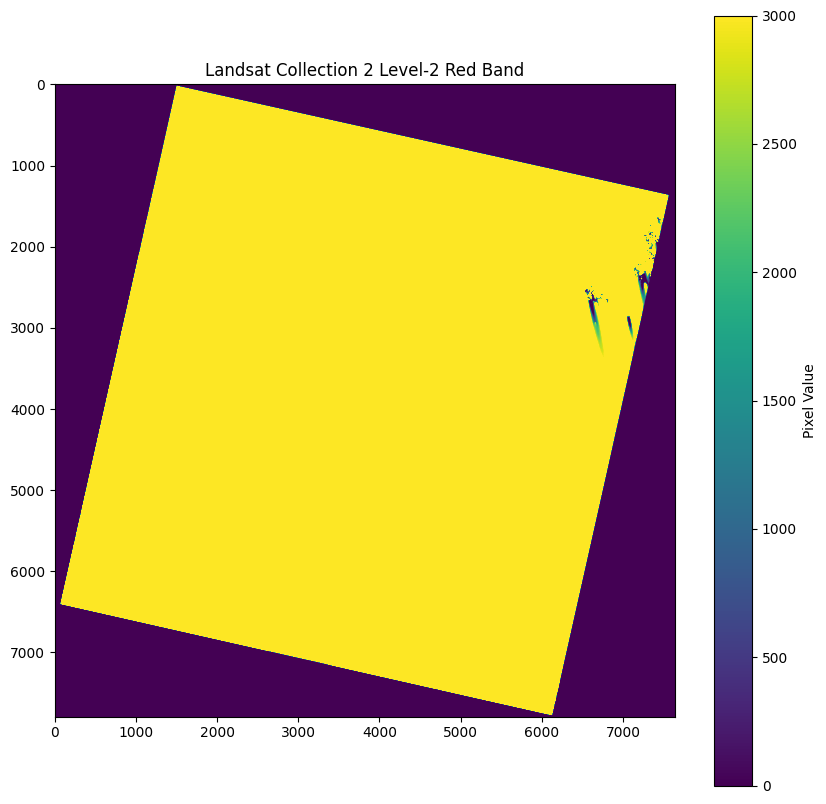

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2/items/LC08_L2SP_163042_20231226_02_T1"
# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Define the desired band key
band_key = "red"

# Open the band
try:
    band = rioxarray.open_rasterio(signed_item.assets[band_key].href)
except KeyError:
    print(f"Error: {band_key} band not found in assets.")
    exit()

# Remove the singleton dimension and plot the single band using Matplotlib imshow()
plt.figure(figsize=(10, 10))
plt.imshow(band.squeeze(), cmap="viridis", vmin=0, vmax=3000)
plt.title(f"Landsat Collection 2 Level-2 {band_key.capitalize()} Band")
plt.colorbar(label="Pixel Value")
plt.show()

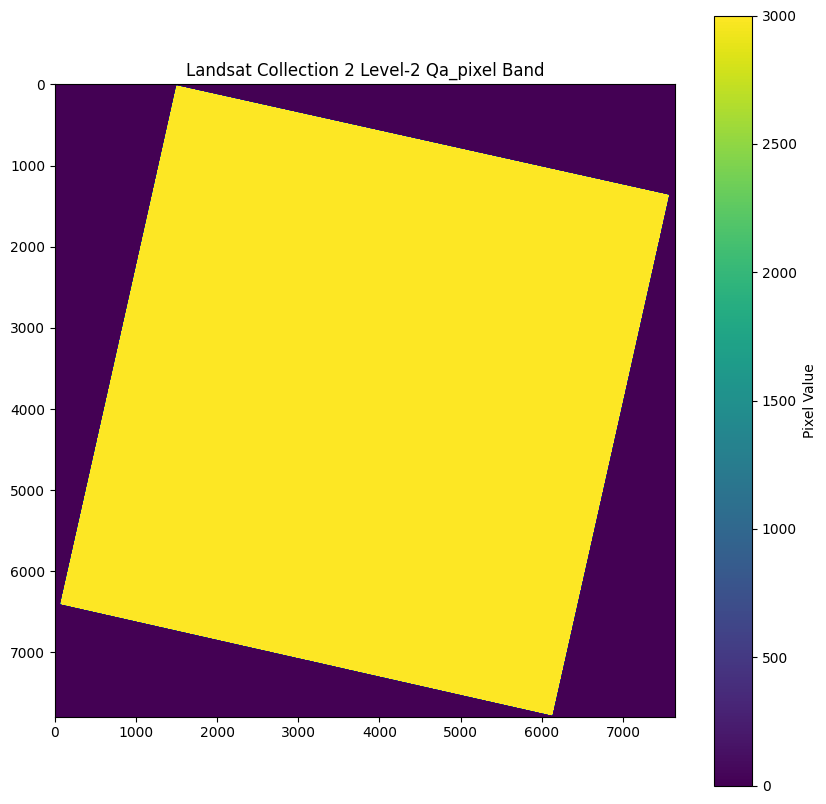

In [ ]:
import pystac
import planetary_computer
import rioxarray
import matplotlib.pyplot as plt

item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2/items/LC08_L2SP_163042_20231226_02_T1"

# Load the individual item metadata and sign the assets
item = pystac.Item.from_file(item_url)
signed_item = planetary_computer.sign(item)

# Define the desired band key
band_key = "qa_pixel"

# Open the band
try:
    band = rioxarray.open_rasterio(signed_item.assets[band_key].href)
except KeyError:
    print(f"Error: {band_key} band not found in assets.")
    exit()

# Remove the singleton dimension and plot the single band using Matplotlib imshow()
plt.figure(figsize=(10, 10))
plt.imshow(band.squeeze(), cmap="viridis", vmin=0, vmax=3000)
plt.title(f"Landsat Collection 2 Level-2 {band_key.capitalize()} Band")
plt.colorbar(label="Pixel Value")
plt.show()